## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

           profitability_ratio
comp_type                     
fmcg                  0.514396
real_est              0.534848
tech                  0.572062
           leverage_ratio
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448


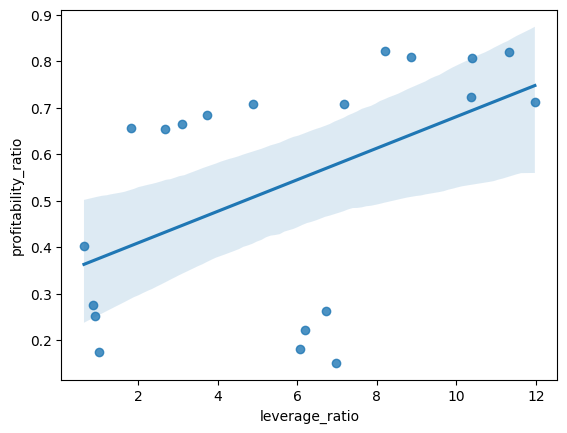

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

# Read in the files
balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
income_statement = pd.read_excel("data/Income_Statement.xlsx")

# Merge both the dataframes and call it df_ratios
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

# You only need to compute one profitability ratio, but since there is a choice, we are providing the code to compute both the gross margin ratio and the operating margin ratio 

# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

# Compute operating margin ratio, but commenting it out
# df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

# You only need to compute one leverage ratio, but we are providing the code to compute both the debt-to-equity ratio and the equity multiplier ratio 

# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]

# Compute equity multiplier ratio, but commenting it out
# df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]

# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))
lowest_profitability = "fmcg"

# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))
highest_leverage = "real_est"

# Plot the leverage ratio on x-axis and profitability on y axis to see if real estate companies with higher leverage ratio have  higher profitability
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")
relationship = "positive"

How to approach the project
1. Reading in data

2. Merging DataFrames

3. Computing ratios

4. Getting average ratios grouped over company type

5. Determining relationship between two financial ratios

Steps to complete

1
Reading in data
This project requires you to compute analyze and compute financial ratios from the provided datasets. In order to do that, you need to import the datasets.


Importing data
2
Merging DataFrames
Some of the ratios you need to compute requires financial information from the balance sheet and income statement. Thus, you would need to merge both of the datasets provided to compute some of the ratios.


Merge Dataframes
Columns used to merge
3
Computing ratios
The ratios can be computed using basic division and/or addition/subtraction operations with pandas.


Computing equity multiplier ratio
4
Getting average ratios grouped over company type
You can use pandas pivot_table function to get an average financial ratio grouped over a column.


Getting the average ratio grouped over a column
5
Determining relationship between two financial ratios
One way to determine the relationship between two financial ratios is by using a regression plot. Regression plot functions can make a scatter plot of two ratios and also draw a line of best fit in the scatter plot. The line of best fit will help ascertain the relationship between the two ratios.


Making a scatter plot with a line of best fit